In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
protein_one = pd.read_csv('/Users/jonathanfarro/Desktop/animal-protein-consumption.csv')

life_ex = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/life-expectancy-hmd-unwpp.csv')

usa_pricing = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/average_prices_for_food.csv')

daily_cals = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv')

fruit_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/fruit-consumption-per-capita.csv')

veg_per_cap = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/vegetable-consumption-per-capita/vegetable-consumption-per-capita.csv' )

nutrition =  pd.read_excel('/Users/jonathanfarro/Desktop/ Capstone Files/food_comp.xlsx')

protein_per_GDP = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/daily-per-capita-protein-supply-vs-gdp-per-capita.csv')

death = pd.read_csv('/Users/jonathanfarro/Desktop/ Capstone Files/death-rate-by-cause-who-mdb.csv')



In [93]:
# rename columns to something easier to work with 

protein = protein_one.rename(columns={
                        protein_one.columns[3]:'fish',
                        protein_one.columns[4]:'poultry',
                        protein_one.columns[5]:'pork',
                        protein_one.columns[6]:'beef',
                        protein_one.columns[7]:'sheep/goat',
                        protein_one.columns[8]:'other',
                        protein_one.columns[9]:'eggs',
                        protein_one.columns[10]:'milk'
                       })

In [94]:
# bulk clean up 
protein = protein.rename(columns=lambda x: x.lower())
protein = protein.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)

life_ex = life_ex.rename(columns = lambda x: x.lower())
life_ex = life_ex.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
life_ex = life_ex.rename(columns = {life_ex.columns[3] : 'life_expectancy(0)'})

protein_per_GDP = protein_per_GDP.rename(columns = lambda x: x.lower())
protein_per_GDP = protein_per_GDP.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)
gdp_population = protein_per_GDP.drop(columns= {protein_per_GDP.columns[3],protein_per_GDP.columns[6]})
gdp_population = gdp_population.rename(columns = { gdp_population.columns[3]: 'gdp_per_capita'}) 


daily_cals = daily_cals.rename(columns = lambda x: x.lower())
daily_cals = daily_cals.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

death = death.rename(columns = lambda x: x.lower())
death = death.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

nutrition = nutrition.rename(columns = lambda x: x.lower())
nutrition = nutrition.map(lambda x:x.lower() if isinstance(x,str) else x).reset_index(drop = True)

fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)


In [95]:
# creating a new column to show total_protein intake for a day.
protein['total_protein'] = protein.iloc[:, 3:11].sum(axis = 1).round(2)
protein.head()

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,6.346136,12.43
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,6.268587,12.37
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,6.813153,13.09
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,6.857546,13.22
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,7.319804,13.82


In [96]:
fruit_per_cap = fruit_per_cap.rename(columns=lambda x: x.lower())
fruit_per_cap = fruit_per_cap.map(lambda x: x.lower() if isinstance(x, str) else x).reset_index(drop=True)
fruit = fruit_per_cap.rename(columns = {fruit_per_cap.columns[3]:'fruit_kilo_yearly'}).reset_index(drop = True)

In [97]:
capstone = pd.merge(protein,
         life_ex,
         on= ['entity','code','year'],
         how= 'inner')

capstone.head()

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,life_expectancy(0)
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,6.346136,12.43,33.2910
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,6.268587,12.37,33.7565
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,6.813153,13.09,34.2008
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,6.857546,13.22,34.6726
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,7.319804,13.82,35.1245


In [98]:
capstone_2 = pd.merge( capstone, gdp_population, on = ['entity','code','year'],how= 'inner')

main_frame = pd.merge(capstone_2,death,  on = ['entity','code','year'],how= 'outer')

final_frame = pd.merge(main_frame, daily_cals,  on = ['entity','code','year'],how= 'outer')

final_frame['total_daily_protein']=final_frame.iloc[:, 3:10].sum(axis=1)

final_frame = final_frame.rename(columns= { 'daily calorie supply per person that comes from animal protein':'daily_cal_animal_protein',
                              'daily calorie supply per person that comes from vegetal protein':'daily_cal_veg_protein',
                              'daily calorie supply per person from fat':'daily_cal_fat',
                              'daily calorie supply per person from carbohydrates':'daily_cal_carbs'})
final_frame

,entity,code,year,fish,poultry,pork,beef,sheep/goat,other,eggs,...,"age-standardized deaths from digestive diseases in both sexes per 100,000 people","age-standardized deaths from unintentional injuries in both sexes per 100,000 people","age-standardized deaths from intentional injuries in both sexes per 100,000 people","age-standardized deaths from neuropsychiatric conditions in both sexes per 100,000 people","age-standardized deaths from respiratory diseases in both sexes per 100,000 people",daily_cal_animal_protein,daily_cal_veg_protein,daily_cal_fat,daily_cal_carbs,total_daily_protein
0,afghanistan,afg,1961,0.010186,0.224101,NaN,2.027096,3.167975,0.366711,0.285220,...,NaN,NaN,NaN,NaN,NaN,55.128870,290.842470,343.88312,2365.0508,6.081289
1,afghanistan,afg,1962,0.010193,0.234435,NaN,2.109914,3.068040,0.377134,0.305785,...,NaN,NaN,NaN,NaN,NaN,54.959705,283.360500,345.01690,2289.9097,6.105502
2,afghanistan,afg,1963,0.010199,0.234585,NaN,2.131660,3.131195,0.458970,0.305980,...,NaN,NaN,NaN,NaN,NaN,57.932200,256.696780,354.04938,2083.1013,6.272589
3,afghanistan,afg,1964,0.010205,0.244912,NaN,2.122574,3.224680,0.438801,0.316345,...,NaN,NaN,NaN,NaN,NaN,58.493233,282.302340,357.72510,2314.9219,6.357517
4,afghanistan,afg,1965,0.010209,0.255223,NaN,2.103040,3.338321,0.469611,0.326686,...,NaN,NaN,NaN,NaN,NaN,61.008570,281.439820,365.04077,2310.2708,6.503089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13403,zimbabwe,zwe,2017,1.140000,2.300000,0.29,17.309998,0.900000,1.270000,0.410000,...,NaN,NaN,NaN,NaN,NaN,105.919990,116.799995,589.76990,1233.5099,23.619997
13404,zimbabwe,zwe,2018,0.769999,1.979999,0.20,17.139986,0.899999,1.209999,0.420000,...,NaN,NaN,NaN,NaN,NaN,101.919920,115.679920,603.26953,1245.1292,22.619982
13405,zimbabwe,zwe,2019,0.500000,2.020001,0.27,17.130005,0.880000,1.200000,0.390000,...,NaN,NaN,NaN,NaN,NaN,100.560030,115.280030,577.17010,1231.9905,22.390006
13406,zimbabwe,zwe,2020,0.490000,3.250001,0.25,16.770008,0.870000,1.150000,0.340000,...,NaN,NaN,NaN,NaN,NaN,111.960045,114.200050,623.25024,1164.5505,23.120011


In [99]:
#creating an all_cause_mortality column, and more cleaning

In [161]:
final_frame['all_cause_per_100k'] = final_frame.iloc[:,15:24].sum(axis=1)

final_frame_two = final_frame.drop(columns=final_frame.columns[15:24])

final_frame_three = final_frame_two[~final_frame_two['entity'].str.contains(r'\(.*\)')]

final = final_frame_three
final = final.rename(columns={'life_expectancy(0)':'life_exp','population (historical)':'population'})

# what countries have eaten the MOST protein rich diets over these years?

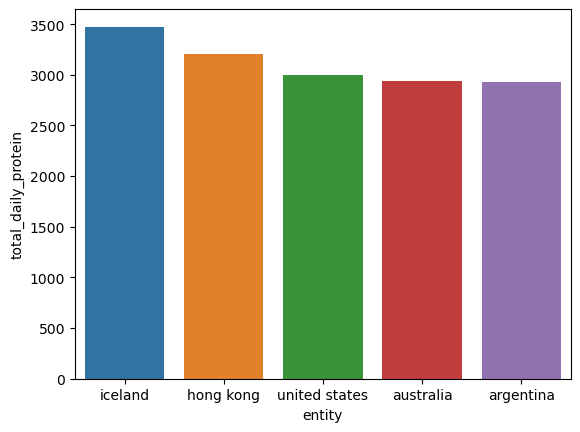

In [164]:
top_five_total_protein = final.groupby(['entity']) \
                                   .agg({'total_daily_protein': 'sum'}) \
                                   .sort_values(by='total_daily_protein', ascending=False) \
                                   .head(5) \
                                   .reset_index()                      

   
sns.barplot(top_five_total_protein,x = 'entity',y='total_daily_protein',hue='entity');

# what countries have eaten the LEAST protein rich diets over these years?

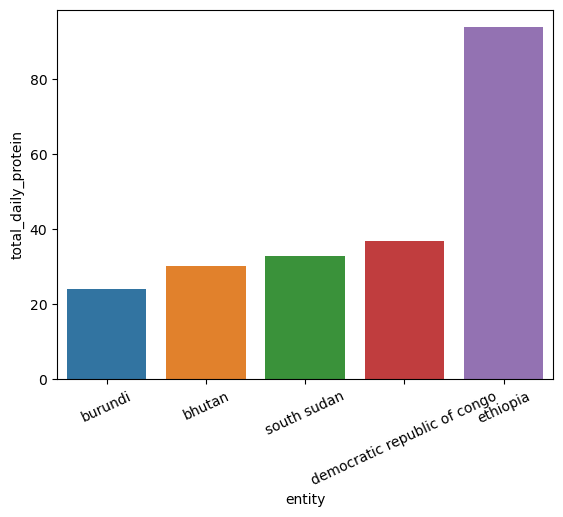

In [114]:
final_2 = final.loc[final['total_daily_protein'] != 0.00]

bottom_five_total_protein = final_2.groupby(['entity']) \
                                   .agg({'total_daily_protein': 'sum'}) \
                                   .sort_values(by='total_daily_protein', ascending=True) \
                                   .head(5) \
                                   .reset_index()                      

   
sns.barplot(bottom_five_total_protein,x = 'entity',y='total_daily_protein',hue='entity')
plt.xticks(rotation = 25);

## top 5 countries who derive protein mainly from animal sources.

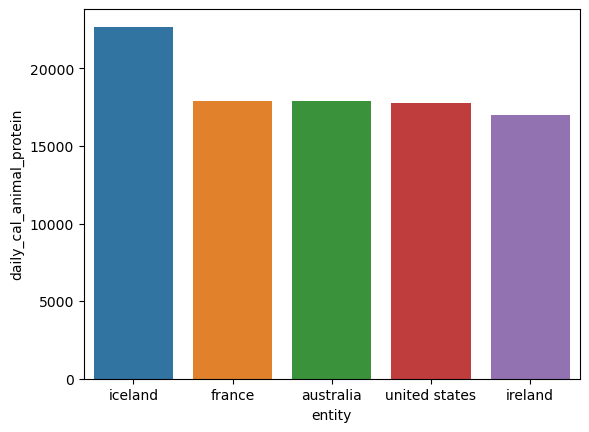

In [118]:
animal_protein = final.groupby(['entity']).agg({
    'daily_cal_animal_protein':'sum'}).sort_values(by='daily_cal_animal_protein',ascending = False).head(5).reset_index()
sns.barplot(animal_protein,x = 'entity',y='daily_cal_animal_protein',hue='entity');

# top 5 countries who derive protein from mainly veg 

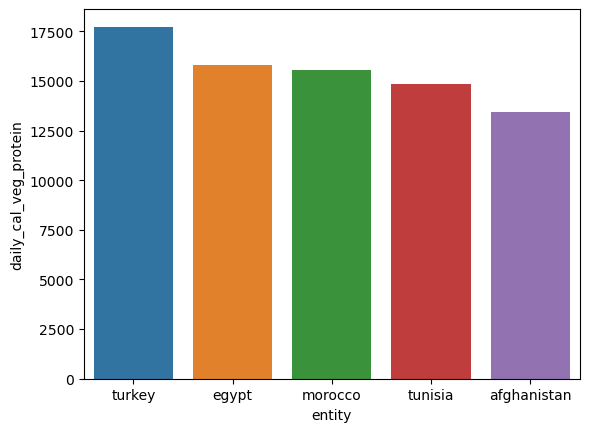

In [121]:
veg_pro = final.groupby(['entity']).agg({
    'daily_cal_veg_protein':'sum'}).sort_values(by='daily_cal_veg_protein',ascending = False).head(5).reset_index()
sns.barplot(veg_pro,x = 'entity',y='daily_cal_veg_protein',hue='entity');



In [123]:
veg_heavy_list = veg_pro.entity.to_list()
animal_heavy_list = animal_protein.entity.to_list()
animal_heavy_list

['iceland', 'france', 'australia', 'united states', 'ireland']

# how does protein type effect all cause mortality. 

In [126]:
all_cause_average = final.groupby(['entity']) \
                                   .agg({'all_cause_per_100k': 'sum'}) \
                                   .reset_index()   

animal_all_cause = all_cause_average.loc[all_cause_average['entity'].isin(animal_heavy_list)].sort_values(by='all_cause_per_100k',ascending = False)

veg_all_cause = all_cause_average.loc[all_cause_average['entity'].isin(veg_heavy_list)].sort_values(by='all_cause_per_100k',ascending = False)
animal_all_cause

,entity,all_cause_per_100k
88,ireland,46421.283994
196,united states,44309.018438
9,australia,41309.403592
63,france,36495.787331
83,iceland,36044.112099


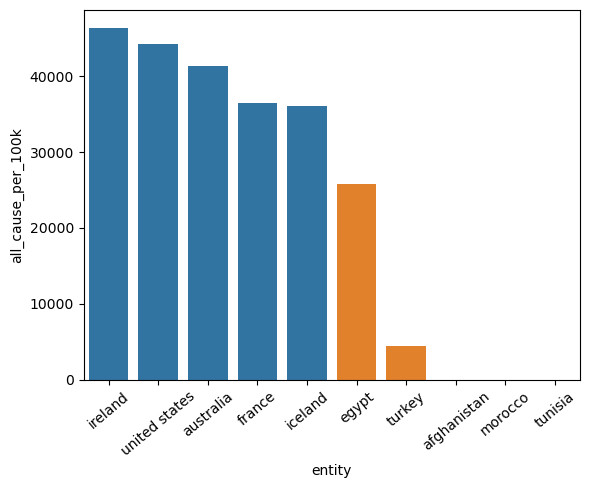

In [128]:
sns.barplot(animal_all_cause,x='entity',y='all_cause_per_100k')
sns.barplot(veg_all_cause,x='entity',y='all_cause_per_100k')
plt.xticks(rotation=40);

# how does life expectancy compare beteween top and bottom veg/animal protein? 

In [141]:
median_life = final.groupby(['entity']) \
                                   .agg({'life_exp': 'median'}) \
                                   .reset_index() 

In [143]:
average_life_exp_animal_protein = median_life.loc[median_life['entity'].isin(animal_heavy_list)]

In [145]:
average_life_exp_veg_protein = median_life.loc[median_life['entity'].isin(veg_heavy_list)]
average_life_exp_veg_protein

,entity,life_exp
0,afghanistan,45.5207
55,egypt,63.0594
124,morocco,62.9186
189,tunisia,69.3985
190,turkey,68.2867


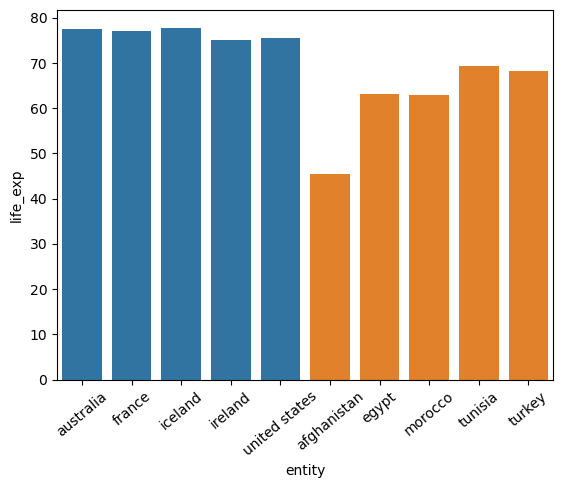

In [147]:
sns.barplot(average_life_exp_animal_protein,x='entity',y='life_exp')
sns.barplot(average_life_exp_veg_protein,x='entity',y='life_exp')
plt.xticks(rotation=40);


In [149]:
final.groupby(['entity']) \
                                   .agg({'all_cause_per_100k': 'max'}) \
                                   .sort_values(by='all_cause_per_100k', ascending=False) \
                                   .head(5) \
                                   .reset_index()  

,entity,all_cause_per_100k
0,guatemala,1482.441905
1,malta,1251.452444
2,guyana,1232.413626
3,turkmenistan,1185.528973
4,south africa,1172.529970


# correlation

In [152]:
correlations = final.iloc[:,2:21].corr()
correlations

,year,fish,poultry,pork,beef,sheep/goat,other,eggs,milk,total_protein,life_exp,gdp_per_capita,population,daily_cal_animal_protein,daily_cal_veg_protein,daily_cal_fat,daily_cal_carbs,total_daily_protein,all_cause_per_100k
year,1.000000,0.098979,0.487998,0.232532,-0.023400,-0.019474,-0.052788,0.213366,0.152506,0.275373,0.487609,0.123520,0.038142,0.260560,0.221388,0.296921,0.223909,0.313568,-0.076139
fish,0.098979,1.000000,0.257570,0.218394,-0.000704,-0.001397,0.030271,0.251274,0.080983,0.429745,0.338497,0.307777,-0.021642,0.420620,-0.202800,0.271536,-0.019248,0.552619,0.058609
poultry,0.487998,0.257570,1.000000,0.418736,0.248295,0.017375,-0.060906,0.477188,0.340851,0.652283,0.601620,0.496201,-0.029746,0.643777,0.008516,0.570384,0.162720,0.721860,0.227872
pork,0.232532,0.218394,0.418736,1.000000,0.284845,-0.095452,-0.016498,0.683172,0.556372,0.710268,0.589064,0.659248,0.027077,0.711683,-0.030402,0.732710,0.139982,0.686372,0.358055
beef,-0.023400,-0.000704,0.248295,0.284845,1.000000,0.243898,0.009013,0.407043,0.503203,0.612108,0.371763,0.429211,-0.037061,0.618428,-0.138269,0.541300,0.047215,0.579033,0.354550
sheep/goat,-0.019474,-0.001397,0.017375,-0.095452,0.243898,1.000000,0.207909,0.039942,0.259816,0.278451,0.080113,0.127534,-0.048934,0.289194,0.025237,0.202589,-0.060467,0.246823,0.041706
other,-0.052788,0.030271,-0.060906,-0.016498,0.009013,0.207909,1.000000,-0.090426,-0.016307,0.106068,-0.134638,0.057702,-0.046522,0.107191,-0.168671,-0.008397,-0.136149,0.155875,-0.105102
eggs,0.213366,0.251274,0.477188,0.683172,0.407043,0.039942,-0.090426,1.000000,0.640368,0.755612,0.708573,0.628075,0.062759,0.755833,0.105051,0.755971,0.309192,0.704490,0.488524
milk,0.152506,0.080983,0.340851,0.556372,0.503203,0.259816,-0.016307,0.640368,1.000000,0.814131,0.624352,0.592487,-0.037033,0.814862,0.045209,0.786887,0.218206,0.592708,0.536167
total_protein,0.275373,0.429745,0.652283,0.710268,0.612108,0.278451,0.106068,0.755612,0.814131,1.000000,0.755248,0.750676,-0.035599,0.998707,-0.079587,0.893778,0.165388,0.950233,0.476309


In [154]:
nutrition.iloc[:,2:20].corr()

,water_(g),energ_kcal,protein_(g),lipid_tot_(g),ash_(g),carbohydrt_(g),fiber_td_(g),sugar_tot_(g),calcium_(mg),iron_(mg),magnesium_(mg),phosphorus_(mg),potassium_(mg),sodium_(mg),zinc_(mg),copper_mg),manganese_(mg),selenium_(µg)
water_(g),1.000000,-0.900554,-0.103979,-0.489781,-0.281244,-0.773920,-0.394281,-0.506365,-0.263806,-0.353255,-0.402719,-0.288052,-0.198637,-0.156234,-0.152804,-0.177720,-0.091474,-0.092437
energ_kcal,-0.900554,1.000000,0.112636,0.806677,0.114172,0.493028,0.204450,0.351313,0.143632,0.199372,0.266927,0.192235,0.076704,0.055515,0.115431,0.129945,0.054017,0.084681
protein_(g),-0.103979,0.112636,1.000000,0.062336,0.096528,-0.304295,-0.081145,-0.302557,0.038643,0.124599,0.205562,0.431661,0.241563,-0.003324,0.415215,0.138486,0.028552,0.373077
lipid_tot_(g),-0.489781,0.806677,0.062336,1.000000,0.004215,-0.048594,-0.027475,-0.002315,0.023242,-0.035869,0.079278,0.064726,-0.042312,0.011321,0.029295,0.057307,0.005185,0.037718
ash_(g),-0.281244,0.114172,0.096528,0.004215,1.000000,0.161640,0.190849,0.029238,0.483594,0.201200,0.289904,0.468383,0.384198,0.825681,0.081448,0.098646,0.067068,0.058911
carbohydrt_(g),-0.773920,0.493028,-0.304295,-0.048594,0.161640,1.000000,0.466204,0.678416,0.214085,0.348522,0.295987,0.072836,0.117583,0.073636,-0.012193,0.098380,0.079730,-0.079519
fiber_td_(g),-0.394281,0.204450,-0.081145,-0.027475,0.190849,0.466204,1.000000,0.120625,0.239417,0.391225,0.591633,0.162620,0.337455,0.007791,0.083333,0.213778,0.120973,-0.019327
sugar_tot_(g),-0.506365,0.351313,-0.302557,-0.002315,0.029238,0.678416,0.120625,1.000000,0.154179,0.132131,0.080979,-0.051407,0.010857,-0.004457,-0.036536,0.028719,0.019813,-0.129425
calcium_(mg),-0.263806,0.143632,0.038643,0.023242,0.483594,0.214085,0.239417,0.154179,1.000000,0.355907,0.313933,0.578628,0.254283,0.178618,0.138809,0.083766,0.074454,0.007622
iron_(mg),-0.353255,0.199372,0.124599,-0.035869,0.201200,0.348522,0.391225,0.132131,0.355907,1.000000,0.403379,0.211132,0.230510,0.030207,0.389234,0.208525,0.124222,0.092436


# who in our world live the longest?

In [174]:
longest_living = final.groupby(['entity']) \
                                   .agg({'life_exp': 'max'}) \
                                   .sort_values(by='life_exp', ascending=False) \
                                   .head(5) \
                                   .reset_index() 

In [185]:
long_life_list = longest_living.entity.to_list()
long_life_list

['hong kong', 'japan', 'macao', 'south korea', 'switzerland']

In [191]:
long_life = final.loc[final['entity'].isin(long_life_list)]

In [217]:
long_life.groupby('entity').agg({'daily_cal_animal_protein':'mean','daily_cal_veg_protein':'mean','gdp_per_capita':'mean','total_daily_protein':'mean'}).reset_index().round(2)

,entity,daily_cal_animal_protein,daily_cal_veg_protein,gdp_per_capita,total_daily_protein
0,hong kong,256.60,146.32,44945.11,47.80
1,japan,185.46,169.59,37595.47,32.67
2,macao,186.30,138.14,83861.36,41.41
3,south korea,116.93,217.25,28888.84,25.38
4,switzerland,239.38,141.56,61845.28,26.76


In [209]:
long_life.columns

Index(['entity', 'code', 'year', 'fish', 'poultry', 'pork', 'beef',
       'sheep/goat', 'other', 'eggs', 'milk', 'total_protein', 'life_exp',
       'gdp_per_capita', 'population', 'daily_cal_animal_protein',
       'daily_cal_veg_protein', 'daily_cal_fat', 'daily_cal_carbs',
       'total_daily_protein', 'all_cause_per_100k'],
      dtype='object')

# who in our world live the shortest?

In [224]:
shortest_lifespan_average = final.groupby(['entity']) \
                                   .agg({'life_exp': 'min'}) \
                                   .sort_values(by='life_exp', ascending=False) \
                                   .head(5) \
                                   .reset_index() 

short_list = shortest_lifespan_average.entity.to_list()

In [228]:
shorter_life = final.loc[final['entity'].isin(short_list)]

In [230]:
shorter_life.groupby('entity').agg({'daily_cal_animal_protein':'mean','daily_cal_veg_protein':'mean','gdp_per_capita':'mean','total_daily_protein':'mean'}).reset_index().round(2)

,entity,daily_cal_animal_protein,daily_cal_veg_protein,gdp_per_capita,total_daily_protein
0,bahrain,249.97,186.64,49172.48,5.86
1,belgium,245.34,160.02,47859.74,11.02
2,luxembourg,293.02,151.76,111800.26,18.26
3,montenegro,274.05,188.48,18066.68,25.90
4,qatar,230.44,235.91,90892.27,7.52
